<a href="https://colab.research.google.com/github/hoantran14/ANN/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mping
from keras.models import load_model
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing import image
import cv2 as cv
import tensorflow as tf
import pandas as pd
from keras.layers import Flatten
from PIL import Image



Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 284s 180ms/step - accuracy: 0.0846 - loss: 4.9117 - val_accuracy: 0.1339 - val_loss: 4.1080 - learning_rate: 0.0010
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 320s 179ms/step - accuracy: 0.2223 - loss: 3.2554 - val_accuracy: 0.1965 - val_loss: 3.6093 - learning_rate: 0.0010
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 332s 185ms/step - accuracy: 0.2924 - loss: 2.8483 - val_accuracy: 0.3084 - val_loss: 2.7903 - learning_rate: 0.0010
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 313s 180ms/step - accuracy: 0.3498 - loss: 2.5611 - val_accuracy: 0.3109 - val_loss: 2.8075 - learning_rate: 0.0010
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 180ms/step - accuracy: 0.4055 - loss: 2.2903 - val_accuracy: 0.3823 - val_loss: 2.4466 - learning_rate: 0.0010
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 179ms/step - accuracy: 0.4502 - loss: 2.0629 - val_accuracy: 0.4099 - val_loss: 2.3134 - learning_rate: 0.0010
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 331

313/313 - 11s - 34ms/step - accuracy: 0.4834 - loss: 2.5883

Accuracy: 0.48339998722076416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


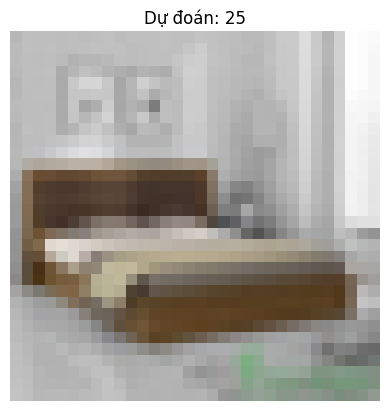

Dự đoán cho /content/bed.jfif: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


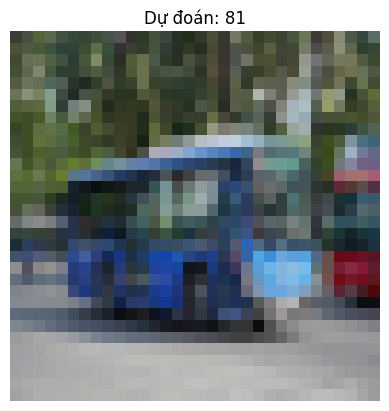

Dự đoán cho /content/bus.jfif: 81
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


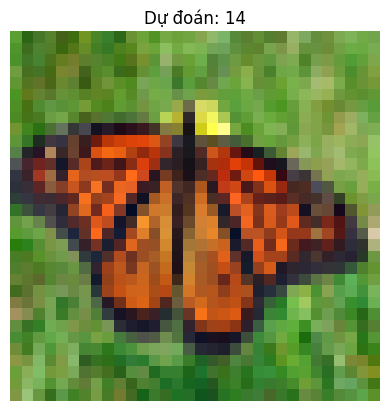

Dự đoán cho /content/butter.jfif: 14


ValueError: cannot reshape array of size 1024 into shape (1,32,32,3)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import ReduceLROnPlateau


cifar100 = tf.keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[reduce_lr])

model.save('cifar100_model.h5')


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nAccuracy:', test_acc)

def predict_external_image(image_path):
    img = Image.open(image_path).resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 32, 32, 3)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    plt.imshow(img)
    plt.title(f"Dự đoán: {predicted_label}")
    plt.axis('off')
    plt.show()
    return predicted_label

external_images = ['/content/bed.jfif', '/content/bus.jfif', '/content/butter.jfif', '/content/ghế.png', '/content/hải cẩu.jfif',
                   '/content/table.jfif', '/content/tủ đồ.jfif', '/content/whale.jfif', '/content/xe máy.jfif', '/content/xe đạp.jfif']

for image_path in external_images:
    result = predict_external_image(image_path)
    print(f"Dự đoán cho {image_path}: {result}")
